# Polynomial(Non linear) Regression with semiconductor device I/V plot

The dataset is a plot of current variation of a device based on the voltage applied. The output is non linear in nature. We have to predict current based on voltage with non linear regression. 

### Following operations performed:

1. Plot the voltage vs current and estimate degree of polynomial curve to fit
2. Split the data into training & testing. It should be a 70:30 split with random_state 2. Obtain polynomial features for training and testing dataset with degree 2. 
3. Perform linear regression on the transformed training dataset. Plot the polynomial curve obtained along with training data set. Does it properly fit or overfit?
4. Predict the output for test dataset, and plot a scatter of test output vs obtained output. Obtain MSE and R^2 score. 

### Vary the degree from 2 to 10. Plot the training dataset and obtained curve for each degree and determine at what degree onwards curve starts to overfit


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('data.csv')
(df.head())

,voltage,current
0,-1.25,-3.164730
1,-1.20,-2.346773
2,-1.15,-1.305936
3,-1.10,-1.891162
4,-1.05,-1.040983


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

### Plot the voltage vs current. What degree of polynomial do you think is this?

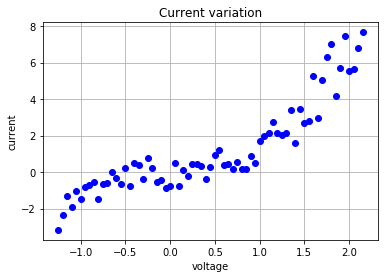

In [4]:
plt.figure()
plt.title("Current variation")
plt.xlabel("voltage")
plt.ylabel("current")
plt.plot(df['voltage'],df['current'],'bo')
plt.grid(True)

### It appears to be polynomial of degree 3

In [5]:
%precision 2
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

### Split the data into training & testing with 70:30 split and random state = 2.

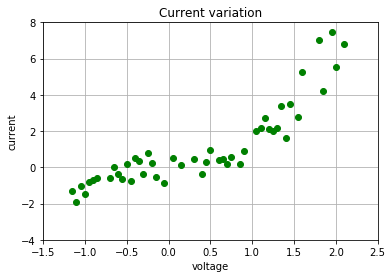

In [6]:
from sklearn.model_selection import train_test_split as tts 
x_train, x_test, y_train, y_test = tts(df['voltage'], df['current'], test_size=0.3, random_state=2)
plt.figure()
plt.title("Current variation")
plt.xlabel("voltage")
plt.ylabel("current")
plt.plot(x_train, y_train,'go')
plt.axis([-1.5,2.5,-4,8])
plt.grid(True)

### Obtain polynomial features for training and testing dataset with degree 2.

In [7]:
poly = PolynomialFeatures (degree= 2)

train_deg = poly.fit_transform(x_train.values.reshape(-1,1))
test_deg = poly.fit_transform(x_test.values.reshape(-1,1))

### Perform linear regression on the transformed training dataset.

In [8]:
pmodel = LinearRegression()
pmodel.fit(train_deg, y_train)
print("expected output", y_train)
print("predicted output", pmodel.predict(train_deg))

expected output 28    0.134684
13   -0.345264
35    0.932366
8    -0.565333
14   -0.624779
64    7.454595
17    0.511143
67    6.826437
56    2.779708
46    2.000633
18    0.374613
12    0.034008
16   -0.750032
2    -1.305936
53    1.619470
19   -0.387191
57    5.266017
6    -0.836266
62    4.188893
24   -0.855777
5    -1.468562
51    2.150837
33   -0.354231
48    2.740402
50    2.024269
54    3.484172
65    5.514608
42    0.167203
4    -1.040983
38    0.452751
3    -1.891162
39    0.174277
37    0.408998
52    3.407732
20    0.772276
26    0.495114
61    7.011223
47    2.150938
21    0.212614
11   -0.581898
31    0.446070
49    2.125739
34    0.277949
7    -0.706068
43    0.881266
22   -0.538719
15    0.210057
40    0.553204
Name: current, dtype: float64
predicted output [-0.14 -0.73  0.51 -0.69 -0.73  5.69 -0.68  6.46  3.86  2.   -0.65 -0.73
 -0.7  -0.48  3.25 -0.62  4.07 -0.64  5.21 -0.4  -0.61  2.87  0.3   2.34
  2.69  3.45  5.94  1.39 -0.57  0.86 -0.53  0.99  0.74  3.06 -0.59 -0.2

### Plot the polynomial curve obtained along with training data set and see if it properly fits

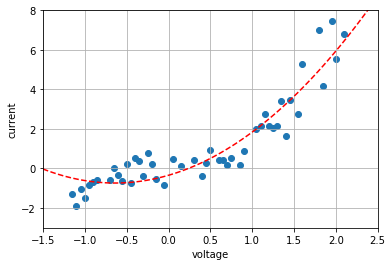

In [9]:
xx = np.linspace(-1.5, 2.5, 101).reshape(-1,1)
xx_quadri= poly.fit_transform(xx)
plt.axis([-1.5,2.5,-3,8])
plt.grid()
plt.plot(xx,pmodel.predict(xx_quadri), c="r" ,linestyle = "--")
plt.scatter(x_train, y_train)
plt.xlabel("voltage")
plt.ylabel("current")
plt.show()

#### The curve fits properly.

### Obtain MSE and R^2 score.

In [11]:
obtained_y_test = pmodel.predict(test_deg)
print(pmodel.score(test_deg, y_test))

0.8797961269012


In [12]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error (y_true = y_test, y_pred = obtained_y_test)
print(mse)

1.0601019878634872


### Predict the output for test dataset, and plot a scatter of test output vs obtained output.

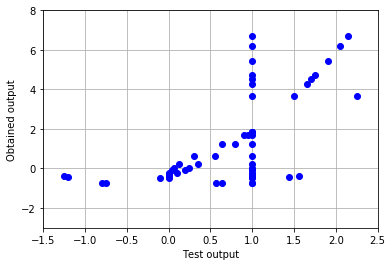

In [13]:
plt.plot(test_deg,obtained_y_test, 'bo')
plt.xlabel("Test output")
plt.ylabel("Obtained output")
plt.axis([-1.5,2.5,-3,8])
plt.grid(True)

### Vary the degree from 2 to 10. Plot the training dataset and obtained curve for each degree and determine at what degree onwards curve starts to overfit

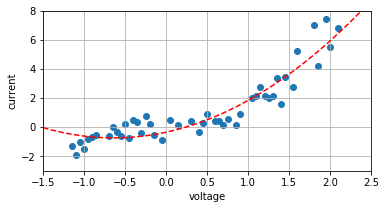

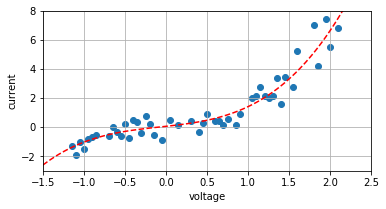

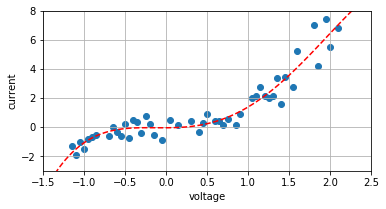

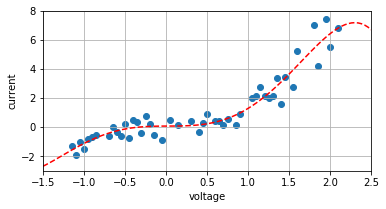

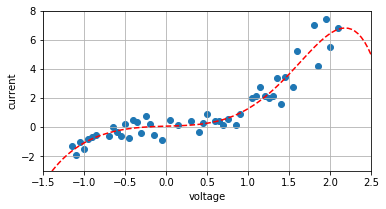

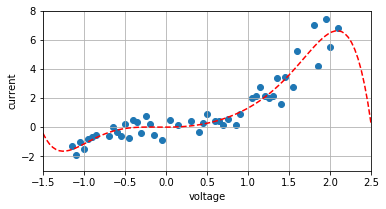

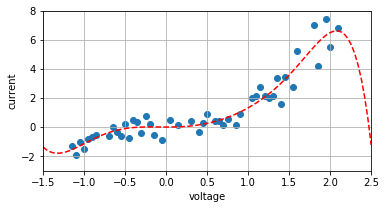

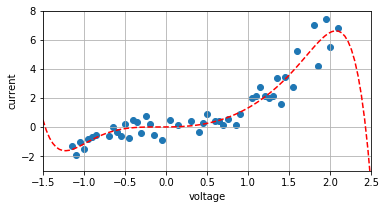

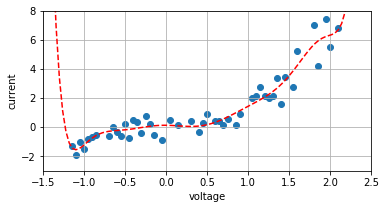

In [14]:
for i in range(2,11):
    plt.figure(figsize=(20,10))
    poly = PolynomialFeatures (degree= i)
    train_deg = poly.fit_transform(x_train.values.reshape(-1,1))
    test_deg = poly.fit_transform(x_test.values.reshape(-1,1))
    pmodel = LinearRegression()
    pmodel.fit(train_deg, y_train)
    plt.subplot(3, 3, i-1)
    xx = np.linspace(-1.5, 2.5, 101).reshape(-1,1)
    xx_quadri= poly.fit_transform(xx)
    plt.plot(xx,pmodel.predict(xx_quadri), c="r" ,linestyle = "--")
    plt.scatter(x_train, y_train)
    plt.xlabel("voltage")
    plt.ylabel("current")
    plt.axis([-1.5,2.5,-3,8])
    plt.grid()
    plt.show()

##### The data starts overfitting from degree 5 and overfitting increases as the degree increases.